# 01 Import Libraries & Data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path = r'/Users/david/Desktop/CF/Data Immersion/Achievement 6 - Advnaced Analytics & Dashboard Design'

In [3]:
# Verify path

path

'/Users/david/Desktop/CF/Data Immersion/Achievement 6 - Advnaced Analytics & Dashboard Design'

In [4]:
# Import 'bnblist_020922.pkl' data set as 'bnblist' dataframe

bnblist = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '02_Sep_2022', 'bnblist_020922'))

In [5]:
# Verify 'bnblist' dataframe

bnblist.head(5)

,listing_id,listing_url,host_id,host_url,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,...,price,min_nights,max_nights,has_availability,availability_365,revs_num,first_rev,last_rev,review_scores_rating,reviews_per_month
0,52390579,https://www.airbnb.com/rooms/52390579,424060909,https://www.airbnb.com/users/show/424060909,Maria Carmen Marta,2021-09-21,NaN,f,2,t,...,752,1,365,t,365,0,NaN,NaN,NaN,NaN
1,35797,https://www.airbnb.com/rooms/35797,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,NaN,f,2,t,...,4056,1,7,t,363,0,NaN,NaN,NaN,NaN
2,15511977,https://www.airbnb.com/rooms/15511977,93364273,https://www.airbnb.com/users/show/93364273,Abraham,2016-09-03,NaN,f,2,f,...,800,1,1125,t,179,1,2018-03-19,2018-03-19,5.00,0.02
3,44616,https://www.airbnb.com/rooms/44616,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,...,18000,1,365,t,347,56,2011-11-09,2022-06-05,4.59,0.43
4,34776449,https://www.airbnb.com/rooms/34776449,2954577,https://www.airbnb.com/users/show/2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,...,1779,1,30,t,222,5,2019-07-04,2022-03-14,5.00,0.14


In [6]:
# Import 'bnbcal_020922.pkl' data set as 'bnbcal' dataframe

bnbcal = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '02_Sep_2022', 'bnbcal_020922'))

In [7]:
# Verify 'bnbcal' dataframe

bnbcal.head(5)

,listing_id,booking_date
0,52390579,2022-06-21
1,52390579,2022-06-22
2,52390579,2022-06-23
3,52390579,2022-06-24
4,52390579,2022-06-25


In [8]:
bnbcal.shape

(7908821, 2)

In [9]:
# Import 'bnbrevs_020922.pkl' data set as 'bnbrevs' dataframe

bnbrevs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '02_Sep_2022', 'bnbrevs_020922'))

In [10]:
# Verify 'bnbrevs' dataframe

bnbrevs.head(5)

,listing_id,rev_id,rev_date
0,15511977,244826501,2018-03-19
1,826691,8301723,2013-10-24
2,826691,8396411,2013-10-28
3,826691,19868762,2014-09-20
4,826691,25550391,2015-01-19


# 02 Merge 'bnblist', 'bnbcal', and 'bnbrevs' & Export 'bnb' as Main Dataframe.

#### It was decided to make the dataframes merging at this stage to be sure on how to proceed in regards to explore the three dataframes variables relationships.

## 02.1 Simplifying 'bnbcal' and 'bnbrevs' dataframes.

#### For the 'bnbcal' and 'bnbrevs' dataframes, the 'listing_id' values will be counted to merge with the main dataframe the number of reviews and bookings made from February 2021 to February 2022.

In [11]:
# Count the number of bookings from February 2021 to Februrary 2022

bnbcal.groupby('listing_id')['booking_date'].count()

listing_id
35797                 365
44616                 365
56074                 365
58955                 365
61792                 365
                     ... 
653188439086968114    365
653529227946128276    365
653539035642324610    365
653613539292913434    365
653653652792522480    365
Name: booking_date, Length: 21668, dtype: int64

In [12]:
# Subset the number of bookings by 'listing_id'

bnbcal_cnts = bnbcal.groupby('listing_id')['booking_date'].count()

In [13]:
# Verify 'bnbcal_cnts'

bnbcal_cnts

listing_id
35797                 365
44616                 365
56074                 365
58955                 365
61792                 365
                     ... 
653188439086968114    365
653529227946128276    365
653539035642324610    365
653613539292913434    365
653653652792522480    365
Name: booking_date, Length: 21668, dtype: int64

In [14]:
# Count the number of reviews from February 2021 to February 2022

bnbrevs.groupby('listing_id')['rev_id'].count()

listing_id
44616                 56
56074                 72
58955                 45
61792                 58
67703                 42
                      ..
649970454615402606     1
650049709671240895     1
650195696316882214     1
650589742951270180     1
650772358845400892     2
Name: rev_id, Length: 17679, dtype: int64

In [15]:
# Subset the number of 'rev_id' by 'listing_id'

bnbrevs_cnts = bnbrevs.groupby('listing_id')['rev_id'].count()

In [16]:
# Verify 'bnbrevs_cnts'

bnbrevs_cnts

listing_id
44616                 56
56074                 72
58955                 45
61792                 58
67703                 42
                      ..
649970454615402606     1
650049709671240895     1
650195696316882214     1
650589742951270180     1
650772358845400892     2
Name: rev_id, Length: 17679, dtype: int64

## 02.2 Merging 'bnblist', 'bnbcal_cnts', and 'bnbrevs_cnts' as 'bnb'

In [17]:
# Merging 'bnblist' and 'bnbcal_cnts' dataframes into 'bnb_list_cal' dataframe

bnblist.merge(bnbcal_cnts, on = 'listing_id', indicator = True)

,listing_id,listing_url,host_id,host_url,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,...,max_nights,has_availability,availability_365,revs_num,first_rev,last_rev,review_scores_rating,reviews_per_month,booking_date,_merge
0,52390579,https://www.airbnb.com/rooms/52390579,424060909,https://www.airbnb.com/users/show/424060909,Maria Carmen Marta,2021-09-21,NaN,f,2,t,...,365,t,365,0,NaN,NaN,NaN,NaN,365,both
1,35797,https://www.airbnb.com/rooms/35797,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,NaN,f,2,t,...,7,t,363,0,NaN,NaN,NaN,NaN,365,both
2,15511977,https://www.airbnb.com/rooms/15511977,93364273,https://www.airbnb.com/users/show/93364273,Abraham,2016-09-03,NaN,f,2,f,...,1125,t,179,1,2018-03-19,2018-03-19,5.00,0.02,365,both
3,44616,https://www.airbnb.com/rooms/44616,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,...,365,t,347,56,2011-11-09,2022-06-05,4.59,0.43,365,both
4,34776449,https://www.airbnb.com/rooms/34776449,2954577,https://www.airbnb.com/users/show/2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,...,30,t,222,5,2019-07-04,2022-03-14,5.00,0.14,365,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21663,618034488468131637,https://www.airbnb.com/rooms/618034488468131637,442065952,https://www.airbnb.com/users/show/442065952,Ricardo,2022-01-25,100,f,79,t,...,1125,t,355,3,2022-05-20,2022-05-29,3.00,2.73,365,both
21664,22107097,https://www.airbnb.com/rooms/22107097,387195495,https://www.airbnb.com/users/show/387195495,Daniela,2021-02-03,100,f,22,t,...,1125,t,314,107,2018-01-04,2022-02-07,4.82,1.97,365,both
21665,40617809,https://www.airbnb.com/rooms/40617809,96471106,https://www.airbnb.com/users/show/96471106,Mary Carmen,2016-09-23,NaN,f,3,t,...,365,t,140,5,2019-12-13,2019-12-31,4.60,0.16,365,both
21666,569519288654139909,https://www.airbnb.com/rooms/569519288654139909,30446640,https://www.airbnb.com/users/show/30446640,Ericka,2015-04-01,100,f,0,t,...,365,t,354,0,NaN,NaN,NaN,NaN,365,both


In [18]:
# Apply merge 

bnb_list_cal = bnblist.merge(bnbcal_cnts, on = 'listing_id', indicator = True)

In [19]:
# Change column name from 'booking_date' to 'bookings_num'

bnb_list_cal.rename(columns = {'booking_date' : 'bookings_num'}, inplace = True)

In [20]:
# Verify column name change

bnb_list_cal.columns

Index(['listing_id', 'listing_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'price', 'min_nights', 'max_nights',
       'has_availability', 'availability_365', 'revs_num', 'first_rev',
       'last_rev', 'review_scores_rating', 'reviews_per_month', 'bookings_num',
       '_merge'],
      dtype='object')

In [21]:
# Drop '_merge' column

bnb_list_cal.drop(columns = ['_merge'])

,listing_id,listing_url,host_id,host_url,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,...,min_nights,max_nights,has_availability,availability_365,revs_num,first_rev,last_rev,review_scores_rating,reviews_per_month,bookings_num
0,52390579,https://www.airbnb.com/rooms/52390579,424060909,https://www.airbnb.com/users/show/424060909,Maria Carmen Marta,2021-09-21,NaN,f,2,t,...,1,365,t,365,0,NaN,NaN,NaN,NaN,365
1,35797,https://www.airbnb.com/rooms/35797,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,NaN,f,2,t,...,1,7,t,363,0,NaN,NaN,NaN,NaN,365
2,15511977,https://www.airbnb.com/rooms/15511977,93364273,https://www.airbnb.com/users/show/93364273,Abraham,2016-09-03,NaN,f,2,f,...,1,1125,t,179,1,2018-03-19,2018-03-19,5.00,0.02,365
3,44616,https://www.airbnb.com/rooms/44616,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,...,1,365,t,347,56,2011-11-09,2022-06-05,4.59,0.43,365
4,34776449,https://www.airbnb.com/rooms/34776449,2954577,https://www.airbnb.com/users/show/2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,...,1,30,t,222,5,2019-07-04,2022-03-14,5.00,0.14,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21663,618034488468131637,https://www.airbnb.com/rooms/618034488468131637,442065952,https://www.airbnb.com/users/show/442065952,Ricardo,2022-01-25,100,f,79,t,...,1,1125,t,355,3,2022-05-20,2022-05-29,3.00,2.73,365
21664,22107097,https://www.airbnb.com/rooms/22107097,387195495,https://www.airbnb.com/users/show/387195495,Daniela,2021-02-03,100,f,22,t,...,2,1125,t,314,107,2018-01-04,2022-02-07,4.82,1.97,365
21665,40617809,https://www.airbnb.com/rooms/40617809,96471106,https://www.airbnb.com/users/show/96471106,Mary Carmen,2016-09-23,NaN,f,3,t,...,1,365,t,140,5,2019-12-13,2019-12-31,4.60,0.16,365
21666,569519288654139909,https://www.airbnb.com/rooms/569519288654139909,30446640,https://www.airbnb.com/users/show/30446640,Ericka,2015-04-01,100,f,0,t,...,3,365,t,354,0,NaN,NaN,NaN,NaN,365


In [22]:
# Merge 'bnb_list_cal' and 'bnbrevs' dataframes into main dataframe called bnb

bnb_list_cal.merge(bnbrevs_cnts, on = 'listing_id')

,listing_id,listing_url,host_id,host_url,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,...,has_availability,availability_365,revs_num,first_rev,last_rev,review_scores_rating,reviews_per_month,bookings_num,_merge,rev_id
0,15511977,https://www.airbnb.com/rooms/15511977,93364273,https://www.airbnb.com/users/show/93364273,Abraham,2016-09-03,NaN,f,2,f,...,t,179,1,2018-03-19,2018-03-19,5.00,0.02,365,both,1
1,44616,https://www.airbnb.com/rooms/44616,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,...,t,347,56,2011-11-09,2022-06-05,4.59,0.43,365,both,56
2,34776449,https://www.airbnb.com/rooms/34776449,2954577,https://www.airbnb.com/users/show/2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,...,t,222,5,2019-07-04,2022-03-14,5.00,0.14,365,both,5
3,56074,https://www.airbnb.com/rooms/56074,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,90,t,2,t,...,t,344,72,2011-04-02,2022-06-19,4.88,0.53,365,both,72
4,58955,https://www.airbnb.com/rooms/58955,282620,https://www.airbnb.com/users/show/282620,Laura,2010-11-09,29,f,1,t,...,t,47,45,2011-12-26,2022-01-06,5.00,0.35,365,both,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17674,51686971,https://www.airbnb.com/rooms/51686971,395371158,https://www.airbnb.com/users/show/395371158,Gabriela,2021-04-03,100,f,0,t,...,t,365,6,2021-09-12,2021-12-05,4.67,0.64,365,both,6
17675,618034488468131637,https://www.airbnb.com/rooms/618034488468131637,442065952,https://www.airbnb.com/users/show/442065952,Ricardo,2022-01-25,100,f,79,t,...,t,355,3,2022-05-20,2022-05-29,3.00,2.73,365,both,3
17676,22107097,https://www.airbnb.com/rooms/22107097,387195495,https://www.airbnb.com/users/show/387195495,Daniela,2021-02-03,100,f,22,t,...,t,314,107,2018-01-04,2022-02-07,4.82,1.97,365,both,107
17677,40617809,https://www.airbnb.com/rooms/40617809,96471106,https://www.airbnb.com/users/show/96471106,Mary Carmen,2016-09-23,NaN,f,3,t,...,t,140,5,2019-12-13,2019-12-31,4.60,0.16,365,both,5


In [23]:
# Apply merge

bnb = bnb_list_cal.merge(bnbrevs_cnts, on = 'listing_id')

In [24]:
# See 'bnb' columns

bnb.columns

Index(['listing_id', 'listing_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'price', 'min_nights', 'max_nights',
       'has_availability', 'availability_365', 'revs_num', 'first_rev',
       'last_rev', 'review_scores_rating', 'reviews_per_month', 'bookings_num',
       '_merge', 'rev_id'],
      dtype='object')

In [25]:
# Drop '_merge' and 'rev_id' columns

bnb = bnb.drop(columns = ['_merge', 'rev_id'])

In [26]:
bnb.shape

(17679, 26)

## 02.3 Export 'bnb' as main dataframe.

In [27]:
bnb.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '05_Sep_2022', 'bnb.pkl'))

# 03 Exploring Relationships.

## 03.1 Subset 'bnb' dataframe.

In [28]:
# 'bnblist' dataframe's columns

bnb.columns

Index(['listing_id', 'listing_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'price', 'min_nights', 'max_nights',
       'has_availability', 'availability_365', 'revs_num', 'first_rev',
       'last_rev', 'review_scores_rating', 'reviews_per_month',
       'bookings_num'],
      dtype='object')

In [29]:
# 'bnb' subset

bnb_sub = bnb[['acceptance_rate',
                   'superhost',
                   'host_listings_count',
                   'host_identity_verified',
                   'latitude', 
                   'longitude',
                   'room_type',
                   'accommodates',
                   'bedrooms',
                   'price',
                   'min_nights',
                   'max_nights',
                   'has_availability',
                   'availability_365',
                   'revs_num',
                   'first_rev',
                   'last_rev',
                   'review_scores_rating',
                   'reviews_per_month',
                   'bookings_num']]

In [30]:
# Verify 'bnblist_sub' subset

bnb_sub

,acceptance_rate,superhost,host_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,price,min_nights,max_nights,has_availability,availability_365,revs_num,first_rev,last_rev,review_scores_rating,reviews_per_month,bookings_num
0,NaN,f,2,f,19.41095,-99.24418,Private room,2,1,800,1,1125,t,179,1,2018-03-19,2018-03-19,5.00,0.02,365
1,66,f,9,t,19.41162,-99.17794,Entire home/apt,14,5,18000,1,365,t,347,56,2011-11-09,2022-06-05,4.59,0.43,365
2,100,t,3,t,19.42641,-99.22591,Private room,3,1,1779,1,30,t,222,5,2019-07-04,2022-03-14,5.00,0.14,365
3,90,t,2,t,19.43977,-99.15605,Entire home/apt,2,1,650,2,250,t,344,72,2011-04-02,2022-06-19,4.88,0.53,365
4,29,f,1,t,19.42113,-99.15955,Entire home/apt,2,1,2019,7,60,t,47,45,2011-12-26,2022-01-06,5.00,0.35,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17674,100,f,0,t,19.48499,-99.06073,Private room,1,1,210,1,365,t,365,6,2021-09-12,2021-12-05,4.67,0.64,365
17675,100,f,79,t,19.49998,-99.22601,Entire home/apt,4,1,673,1,1125,t,355,3,2022-05-20,2022-05-29,3.00,2.73,365
17676,100,f,22,t,19.50787,-99.22067,Entire home/apt,3,1,897,2,1125,t,314,107,2018-01-04,2022-02-07,4.82,1.97,365
17677,NaN,f,3,t,19.50753,-99.22506,Entire home/apt,1,1,230,1,365,t,140,5,2019-12-13,2019-12-31,4.60,0.16,365


## 03.2 Correlation Matrix Heatmap for 'bnb_sub'.

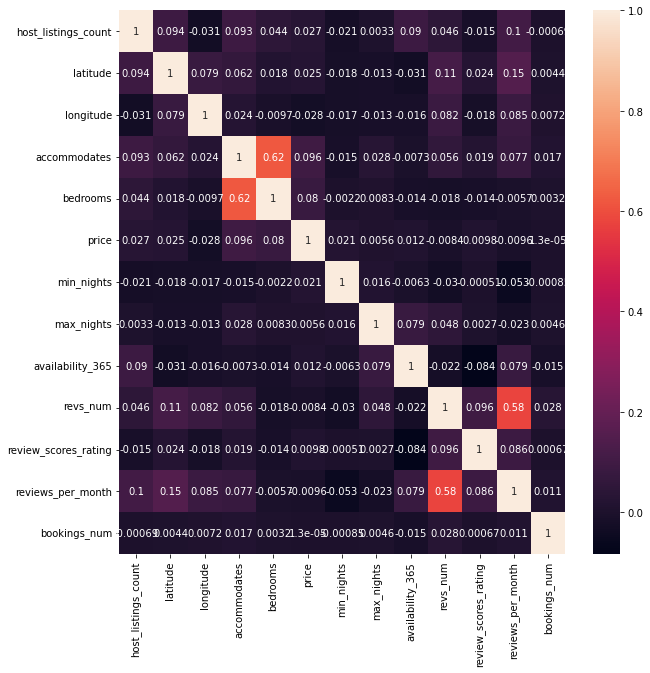

In [31]:
# Create subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create correlation heatmap in seaborn by applying heatmap onto the correlation matrix and subplots defined above

corr = sns.heatmap(bnb_sub.corr(), annot = True, ax = ax)

#### The most relevant variables either are non-linear varaibles since the coefficients formed in this plot, os simply they're not realted at all--if this is the case, most likely some varaibles will have to be derived:

##### - 'host_listings_count'
##### - 'rooom_type'
##### - 'price'
##### - 'latitude' & 'longitude'
##### - 'reviews_per_month'
##### - bookings seasonality--will be derived as a categorical variable
##### - 'bookings_num'

#### The only relevant correlations are those between 'revs_num'/'reviews_per_month' and 'accommodates'/'bedrooms', which really don't provide any relevant information that can be used to unveil, for example, if there's anything that can point to the impact of the multiple listings held by a single host.

## 03.3 Scatterplots for 'bnb'.

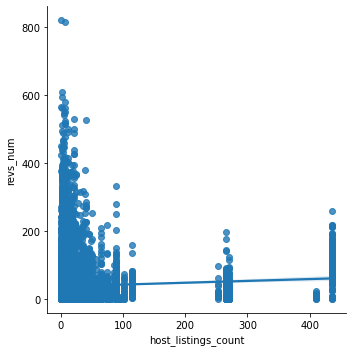

In [32]:
# Scatterplot: 'host_listings_count' & 'reviews_per_month'

sns.lmplot(x = 'host_listings_count', y = 'revs_num', data = bnb)


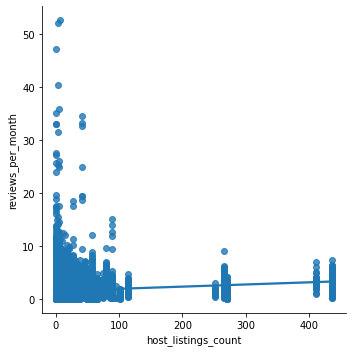

In [33]:
sns.lmplot(x = 'host_listings_count', y = 'reviews_per_month', data = bnb)

#### There's indeed a weak realtionship between these two variables, and there's great degree of variability.

## 03.4 Pair Plots for 'bnb_sub'.

In [34]:
# Create subset for 'host_listings_count', 'price', 'reviews_per_month', 'bookings_num'

bnb_sub_2 = bnb_sub[['host_listings_count', 'price', 'reviews_per_month', 'bookings_num']]

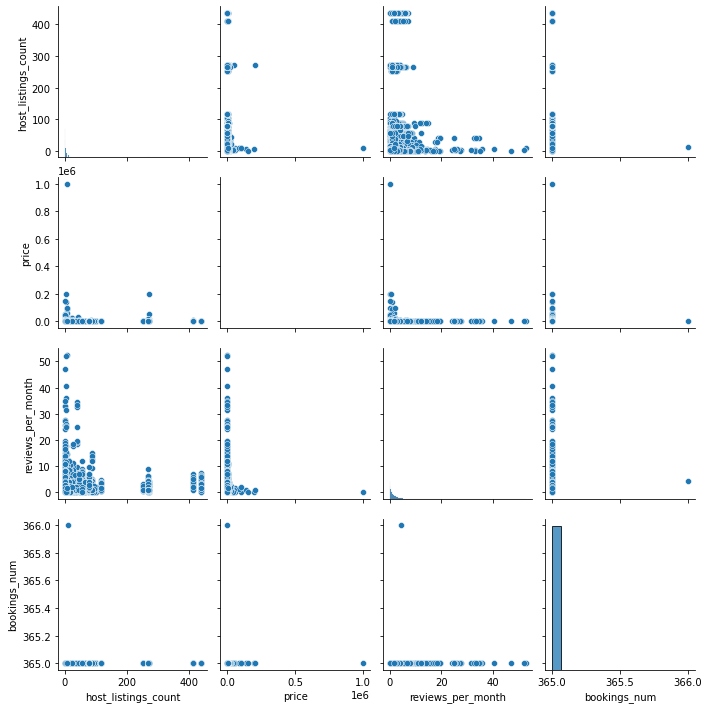

In [35]:
# Create pair plots

g = sns.pairplot(bnb_sub_2, palette = 'husl')

#### At simple sight we cansee that there's a weak to medium negative non-linear relationship between the number of listings held by hosts and the number of reviews per month; one might think that the more listings you have, the more reviews you'd receive, but this is not the case as happens that hosts that hold one listing actually have more reviews per month--this is not determinant for teh analysis, but it's a n interesting starting point. 

#### It also appears that in terms of price a certain degree of competitiveness can be seen as hosts offer their spaces more less in the same ranges despite the number of listings; the number of reviews apparently is affected by other type of factors, like service, for example.

#### This plot does not show a strong positive or negative relevant relationship, for which most likely other elements will have to be evaluated, derived or the perspective would have to change to deveal useful information.

## 03.4 Categorical Plots for 'bnb'.

<AxesSubplot:xlabel='host_listings_count', ylabel='Count'>

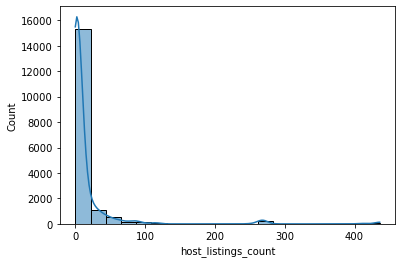

In [36]:
# Create histogram

sns.histplot(bnb['host_listings_count'], bins = 20, kde = True)

<AxesSubplot:xlabel='price', ylabel='Count'>

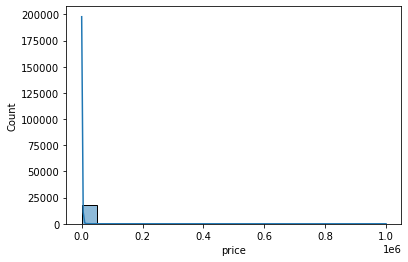

In [37]:
sns.histplot(bnb['price'], bins = 20, kde = True)

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

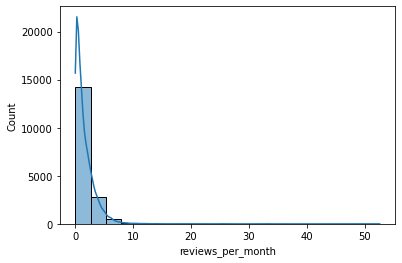

In [38]:
sns.histplot(bnb['reviews_per_month'], bins = 20, kde = True)

<AxesSubplot:xlabel='bookings_num', ylabel='Count'>

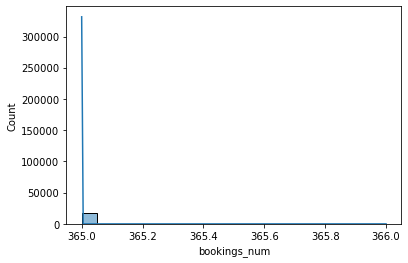

In [39]:
sns.histplot(bnb['bookings_num'], bins = 20, kde = True)

<AxesSubplot:xlabel='host_since', ylabel='Count'>

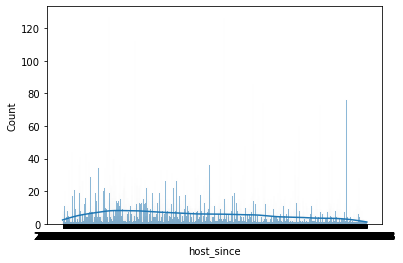

In [40]:
sns.histplot(bnb['host_since'], bins = 20, kde = True)

<AxesSubplot:xlabel='room_type', ylabel='Count'>

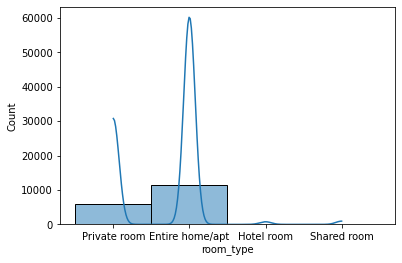

In [41]:
sns.histplot(bnb['room_type'], bins = 20, kde = True)

<AxesSubplot:xlabel='listing_id', ylabel='Count'>

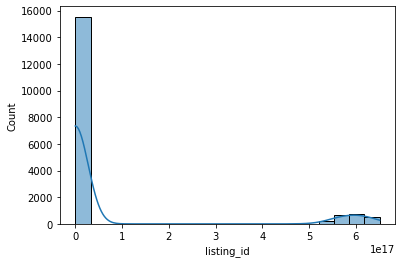

In [42]:
# Create histogram

sns.histplot(bnb['listing_id'], bins = 20, kde = True)

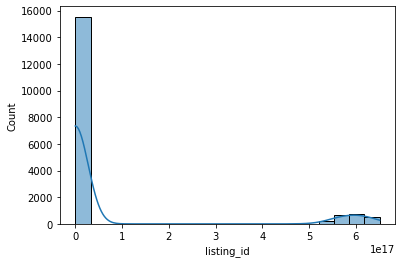

In [43]:
# Define 'hist_listings_cnt' figure

hist_listings_cnt = sns.histplot(bnb['listing_id'], bins = 20, kde = True)

In [44]:
# Save 'hist_listings_cnt' figure

hist_listings_cnt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_listings_cnt.png'))

#### Consecutive visalizations will be directly defined to be saved

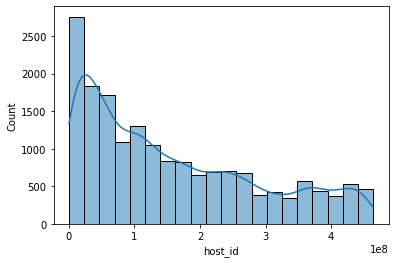

In [45]:
# Create and define histogram

hist_hosts_cnt = sns.histplot(bnb['host_id'], bins = 20, kde = True)

In [46]:
# Save 'hist_hosts_cnt' figure

hist_hosts_cnt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hosts_cnt.png'))

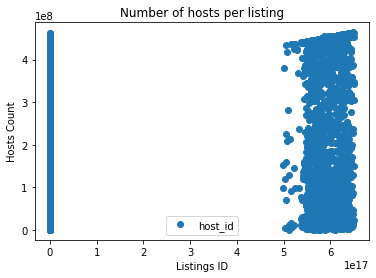

In [47]:
# Create and define scatterplot

scatt_Xlistings_yhosts = (

bnb.plot(x = 'listing_id', y='host_id',style='o'),
plt.title('Number of hosts per listing'),  
plt.xlabel('Listings ID'),  
plt.ylabel('Hosts Count'), 
plt.show(),
)

In [48]:
# Save 'scatt_Xlistings_yhosts' figure

scatt_Xlistings_yhosts

(<AxesSubplot:title={'center':'Number of hosts per listing'}, xlabel='Listings ID', ylabel='Hosts Count'>,
 Text(0.5, 1.0, 'Number of hosts per listing'),
 Text(0.5, 17.200000000000003, 'Listings ID'),
 Text(17.200000000000003, 0.5, 'Hosts Count'),
 None)

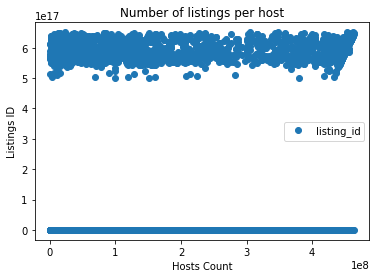

In [49]:
bnb.plot(x = 'host_id', y='listing_id',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of listings per host')  
plt.xlabel('Hosts Count')  
plt.ylabel('Listings ID')  
plt.show()

#### There's really no determining evidence that supports that the airbnb has diverged from shared-economy model into a business held by privates that's directly impacting the communities in terms of gentrification or (increased) costs.

## 04 Notes

#### It was believed that more people was making busines out of renting their own or rented spaces, but apparently the majority of people offering spaces through Airbnb's platform, have listed only spaces they own, mainly entire apts. or houses and in second place private rooms within their living spaces. 

#### Is Airbnb actually fomenting the shared-economy practice in city of dimesnions like Mexico City?

## Additional EA